In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
from orphics import maps, stats, cosmology
import pandas as pd

import sys, os
sys.path.append("/global/homes/h/hongbo/tools/cmblensplus/wrap")
import curvedsky
from math import pi
import matplotlib as mpl
mpl.rcParams['font.size']=13

sys.path.append(os.path.dirname(os.getcwd()))     

import param as p
from math import pi

import matplotlib as mpl
mpl.rcParams['font.size']=12

In [2]:
class bin1D(object):
    def __init__(self, ls, bin_edges):
        self.centers = (bin_edges[1:]+bin_edges[:-1])/2.
        self.digitized = np.digitize(ls, bin_edges,right=True)
        self.bin_edges = bin_edges
    def bin(self,data1d,weights=None):
        if weights is None:
            res = np.bincount(self.digitized,(data1d).reshape(-1))[1:-1]/np.bincount(self.digitized)[1:-1]
        else:
            res = np.bincount(self.digitized,(data1d*weights).reshape(-1))[1:-1]/np.bincount(self.digitized,weights.reshape(-1))[1:-1]
        return self.centers,res

In [4]:
lmax = 6000
ls = np.arange(0, lmax+1)
ellmin = 30
ellmax = 3000
ells = np.arange(0, ellmax+1)
factor = ells*(ells+1)/(2*pi)
Tcmb  = 2.726e6 

clpp = np.loadtxt('../inputPs/cosmo2017_10K_acc3_lenspotentialCls.dat', usecols=5, unpack=True)
clpp = np.concatenate(([0,0],clpp))
clkk = clpp[ells]*ells**4/4

In [5]:
sim_num1, sim_num2 = 0,100
EB_inkap_x_inkaps = []
EB_inkap_x_reckaps = []
EB_rot_inkap_x_reckaps = []

EB_reckap_x_reckaps = []
EB_rot_reckap_x_reckaps = []

for isim in range(sim_num1, sim_num2):
    recon_ps = pd.read_csv(f'../output/recon_ps/CMB_S4_{isim}_30_%s_n.csv'%ellmax)
    EB_inkap_x_inkaps.append(recon_ps['EB_inkap_x_inkap'])
    EB_inkap_x_reckaps.append(recon_ps['EB_inkap_x_reckap'])
    EB_rot_inkap_x_reckaps.append(recon_ps['EB_rot_inkap_x_reckap'])
    
    EB_reckap_x_reckaps.append(recon_ps['EB_reckap_x_reckap'])
    EB_rot_reckap_x_reckaps.append(recon_ps['EB_rot_reckap_x_reckap'])
    
                                      
EB_inkap_x_inkaps = np.array(EB_inkap_x_inkaps)
EB_inkap_x_reckaps = np.array(EB_inkap_x_reckaps)
EB_rot_inkap_x_reckaps = np.array(EB_rot_inkap_x_reckaps)

EB_reckap_x_reckaps = np.array(EB_reckap_x_reckaps)
EB_rot_reckap_x_reckaps = np.array(EB_rot_reckap_x_reckaps)

In [6]:
lens_fac = ells*(ells+1)/2

give_fac = False
if give_fac == True:
    fac = (ells*(ells+1))**2/(2*pi)
else:
    fac =1

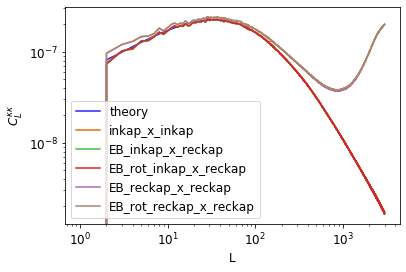

In [7]:
plt.plot(ells, 2*pi/4*clpp[ells], label='theory')
plt.plot(ells, np.mean(EB_inkap_x_inkaps, axis=0), label='inkap_x_inkap')

plt.plot(ells, fac*np.mean(EB_inkap_x_reckaps, axis=0), label='EB_inkap_x_reckap')
plt.plot(ells, fac*np.mean(EB_rot_inkap_x_reckaps, axis=0), label='EB_rot_inkap_x_reckap')

plt.plot(ells, fac**2*np.mean(EB_reckap_x_reckaps, axis=0), label='EB_reckap_x_reckap')
plt.plot(ells, fac**2*np.mean(EB_rot_reckap_x_reckaps, axis=0), label='EB_rot_reckap_x_reckap')

plt.xlabel('L')
plt.ylabel('$C_L^{\kappa\kappa}$')
plt.legend()
plt.xscale('log')
plt.yscale('log')

/global/u2/h/hongbo/.conda/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


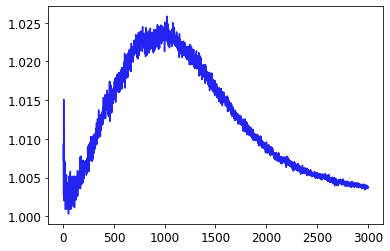

In [8]:
plt.plot(np.mean(EB_rot_reckap_x_reckaps, axis=0)/np.mean(EB_reckap_x_reckaps, axis=0))

In [9]:
# calculate the RDN0 difference
teb_cls = pd.read_csv('./teb_cls.csv')
rot_teb_cls = pd.read_csv('./rot_teb_cls.csv')

In [10]:
if 0:
    plt.plot(ells[2:], ((rot_teb_cls['EE'][ells]-teb_cls['EE'][ells])/teb_cls['EE'][ells])[2:])
    plt.plot(ells[2:], ((rot_teb_cls['BB'][ells]-teb_cls['BB'][ells])/teb_cls['BB'][ells])[2:])

In [11]:
theory = cosmology.default_theory()                                                                                                                                                           
ls = np.arange(0, lmax+1)                                                                                                                                                                     
clee = theory.lCl('EE', ls)                                                                                                                                                                   
clbb = theory.lCl('BB', ls)

params = {}
params['nlev_t'] = 7
params['nlev_p'] = 7*2**0.5
params['beam_arcmin'] = 1.4
params['ellmin'] = ellmin
params['ellmax'] = ellmax
imax = params['ellmax']+1

nlee = (params['nlev_p']*np.pi/180/60)**2/maps.gauss_beam(ls, params['beam_arcmin'])**2

# oclee = clee + nlee
# oclbb = clbb + nlee
# rot_oclee = clee + nlee
# rot_oclbb = clbb + nlee

oclee = teb_cls['EE'] + nlee
oclbb = teb_cls['BB'] + nlee
rot_oclee = rot_teb_cls['EE'] + nlee
rot_oclbb = rot_teb_cls['BB'] + nlee

# oclee = teb_cls['EE']
# oclbb = teb_cls['BB'] 
# rot_oclee = rot_teb_cls['EE'] 
# rot_oclbb = rot_teb_cls['BB'] 
# rot_oclee = oclee
# rot_oclbb = oclbb

In [27]:
n0 = curvedsky.norm_quad.qeb('lens', params['ellmax'], params['ellmin'], \
                             params['ellmax'],clee[:imax], oclee[:imax], oclbb[:imax], lfac='k')[0]
n0_rot = curvedsky.norm_quad.qeb('lens', params['ellmax'], params['ellmin'], \
                                 params['ellmax'],clee[:imax], rot_oclee[:imax], rot_oclbb[:imax], lfac='k')[0]

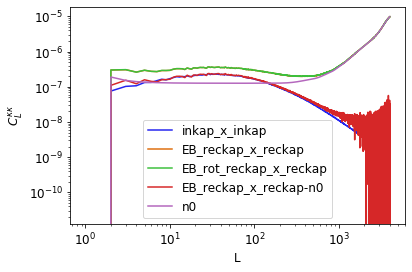

In [28]:
plt.plot(ells, np.mean(EB_inkap_x_inkaps, axis=0), label='inkap_x_inkap')
plt.plot(ells, np.mean(EB_reckap_x_reckaps, axis=0), label='EB_reckap_x_reckap')
plt.plot(ells, np.mean(EB_rot_reckap_x_reckaps, axis=0), label='EB_rot_reckap_x_reckap')
plt.plot(ells, np.mean(EB_reckap_x_reckaps, axis=0)-n0, label='EB_reckap_x_reckap-n0')
plt.plot(ells, n0, label='n0')

plt.xlabel('L')
plt.ylabel('$C_L^{\kappa\kappa}$')
plt.legend()
plt.xscale('log')
plt.yscale('log')

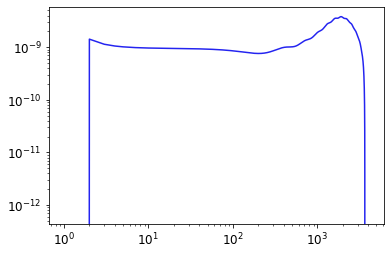

In [29]:
plt.plot((n0_rot - n0))
plt.xscale('log')
plt.yscale('log')

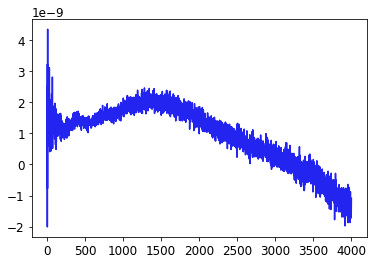

In [30]:
plt.plot(np.mean(EB_rot_reckap_x_reckaps, axis=0) - np.mean(EB_reckap_x_reckaps, axis=0))

/global/u2/h/hongbo/.conda/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


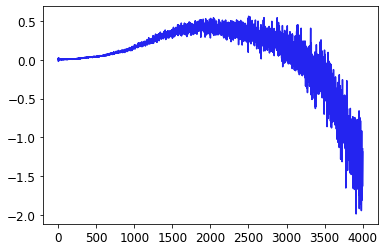

In [31]:
plt.plot((np.mean(EB_rot_reckap_x_reckaps, axis=0) - np.mean(EB_reckap_x_reckaps, axis=0))/np.mean(EB_inkap_x_inkaps, axis=0))

/global/u2/h/hongbo/.conda/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


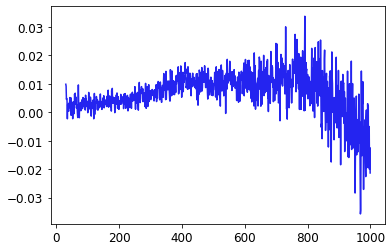

In [32]:
bias_cal = ((np.mean(EB_rot_reckap_x_reckaps, axis=0) - np.mean(EB_reckap_x_reckaps, axis=0))-(n0_rot -n0))\
         /np.mean(EB_inkap_x_inkaps, axis=0)
plt.plot(ells[params['ellmin']:1000], bias_cal[params['ellmin']:1000])

/global/u2/h/hongbo/.conda/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


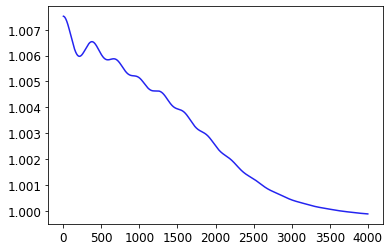

In [33]:
plt.plot(n0_rot/n0)

Text(0, 0.5, '$\\Delta \\hat{C}^{\\kappa \\kappa}_{L}/C^{\\kappa \\kappa}_{L}$')

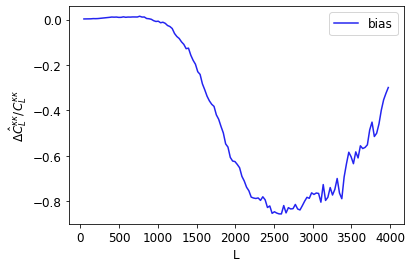

In [34]:
bin_edge = np.arange(ellmin, ellmax, 30)
binner = bin1D(ells, bin_edge)

L_bin, bias_cal_bin = binner.bin(bias_cal)

plt.plot(L_bin, bias_cal_bin, label='bias')

plt.legend()
plt.xlabel('L')
plt.ylabel('$\Delta \hat{C}^{\kappa \kappa}_{L}/C^{\kappa \kappa}_{L}$')